In [1]:
# ! pip install astroML

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
import matplotlib
import pandas as pd
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
import astropy
import gudhi
from astropy.cosmology import WMAP9 as cosmo

import astroML

# from astroML.datasets import fetch_sdss_galaxy_colors
import ripser
import persim


%config InlineBackend.figure_format='retina'


# Load the data from astroML

In [2]:
# Fetch and prepare the data
from astroML.datasets import fetch_sdss_specgals
data = fetch_sdss_specgals()

In [3]:
df = pd.DataFrame(data)

In [4]:
df.columns

Index(['ra', 'dec', 'mjd', 'plate', 'fiberID', 'z', 'zErr', 'rChi2', 'velDisp',
       'velDispErr', 'extinction_r', 'petroMag_r', 'psfMag_r', 'psfMagErr_r',
       'modelMag_u', 'modelMagErr_u', 'modelMag_g', 'modelMagErr_g',
       'modelMag_r', 'modelMagErr_r', 'modelMag_i', 'modelMagErr_i',
       'modelMag_z', 'modelMagErr_z', 'petroR50_r', 'petroR90_r',
       'nii_6584_flux', 'nii_6584_flux_err', 'h_alpha_flux',
       'h_alpha_flux_err', 'oiii_5007_flux', 'oiii_5007_flux_err',
       'h_beta_flux', 'h_beta_flux_err', 'h_delta_flux', 'h_delta_flux_err',
       'd4000', 'd4000_err', 'bptclass', 'lgm_tot_p50', 'sfr_tot_p50', 'objID',
       'specObjID'],
      dtype='object')

In [5]:
df.shape

(661598, 43)

In [6]:
df.head()

,ra,dec,mjd,plate,fiberID,z,zErr,rChi2,velDisp,velDispErr,...,h_beta_flux_err,h_delta_flux,h_delta_flux_err,d4000,d4000_err,bptclass,lgm_tot_p50,sfr_tot_p50,objID,specObjID
0,146.714191,-1.041276,51630,266,1,0.021222,0.000009,1.500621,131.863571,4.193524,...,6.650275,23.382048,6.433518,1.864509,0.014446,3,10.294713,-0.527342,1237648720142401611,299489677444933632
1,146.744142,-0.652220,51630,266,2,0.203783,0.000039,1.302946,174.164764,13.752029,...,2.697799,1.221214,2.102120,2.157893,0.054713,-1,11.365371,-0.772339,1237650795146510627,299489952322840576
2,146.628573,-0.765147,51630,266,4,0.064656,0.000021,1.227630,123.036331,9.821034,...,2.906838,6.669699,3.581208,1.798716,0.030005,3,10.565862,-1.155230,1237650795146445031,299490502078654464
3,146.631673,-0.988261,51630,266,6,0.052654,0.000009,1.404003,41.803913,24.241034,...,2.279489,11.307991,3.058364,1.388878,0.033203,1,9.363875,-0.411009,1237648720142401670,299491051834468352
4,146.919416,-0.990517,51630,266,7,0.213861,0.000040,1.332148,143.521133,14.563519,...,2.622802,0.239994,2.116302,1.923569,0.047452,-1,11.161670,-0.350026,1237648720142532891,299491326712375296


## Extract RA, DEC and Redshift of each galaxie and convert to XYZ

In [8]:
# Create a SkyCoord object with the given RA, DEC, and redshift
coord = SkyCoord(ra=df["ra"].values*u.degree, dec=df["dec"].values*u.degree, distance=cosmo.luminosity_distance(df["z"].values))

# Convert to Cartesian coordinates (x, y, z)
# in Mpc
x = coord.cartesian.x.value
y = coord.cartesian.y.value
z = coord.cartesian.z.value

In [9]:
# extract every 1000 so it doesn't take forever to do things
x_redu = x.copy()[::1000]
y_redu = y.copy()[::1000]
z_redu = z.copy()[::1000]


In [10]:
x_redu.shape

(662,)

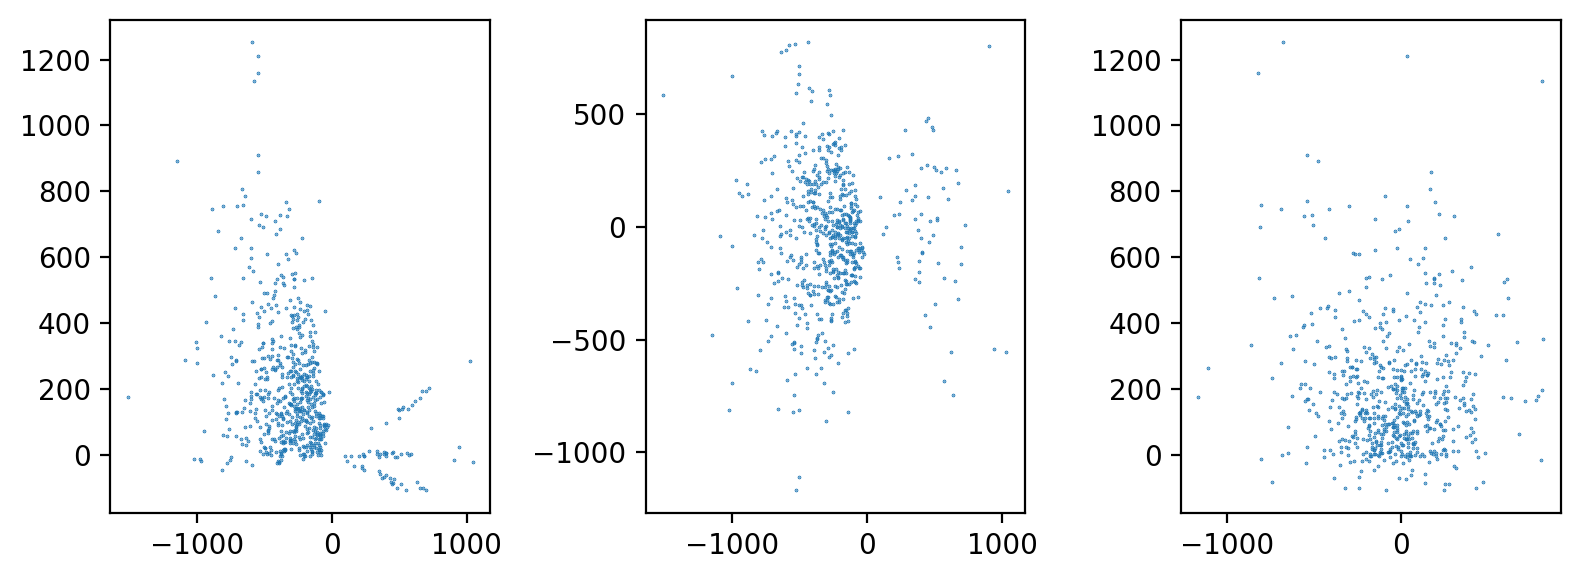

In [11]:
# plot the x,y,z coordinates
plt.figure(figsize = (8, 3))
plt.subplot(131)
plt.scatter(x_redu, z_redu, s = 0.1)
plt.subplot(132)
plt.scatter(x_redu, y_redu, s = 0.1)
plt.subplot(133)
plt.scatter(y_redu, z_redu, s = 0.1)

plt.tight_layout()

# Create the distance matrix

In [12]:
# distance matrix
# https://gitlab.com/voglab/PersistentImages_Chemistry/-/blob/master/Element_PI.py?ref_type=heads
Distance = np.zeros(shape=(len(x_redu),len(x_redu)))
for i in range(0, len(x_redu)):
    # Make an array for each atom
    for j in range(0, len(x_redu)):
    #Calculate the distance between every atom
        Distance[i][j] = np.sqrt(  ((x_redu[i] - x_redu[j])**2)  + ((y_redu[i] - y_redu[j])**2)  + ((z_redu[i] - z_redu[j]) **2)  )



In [13]:
Distance.shape, len(x_redu)

((662, 662), 662)

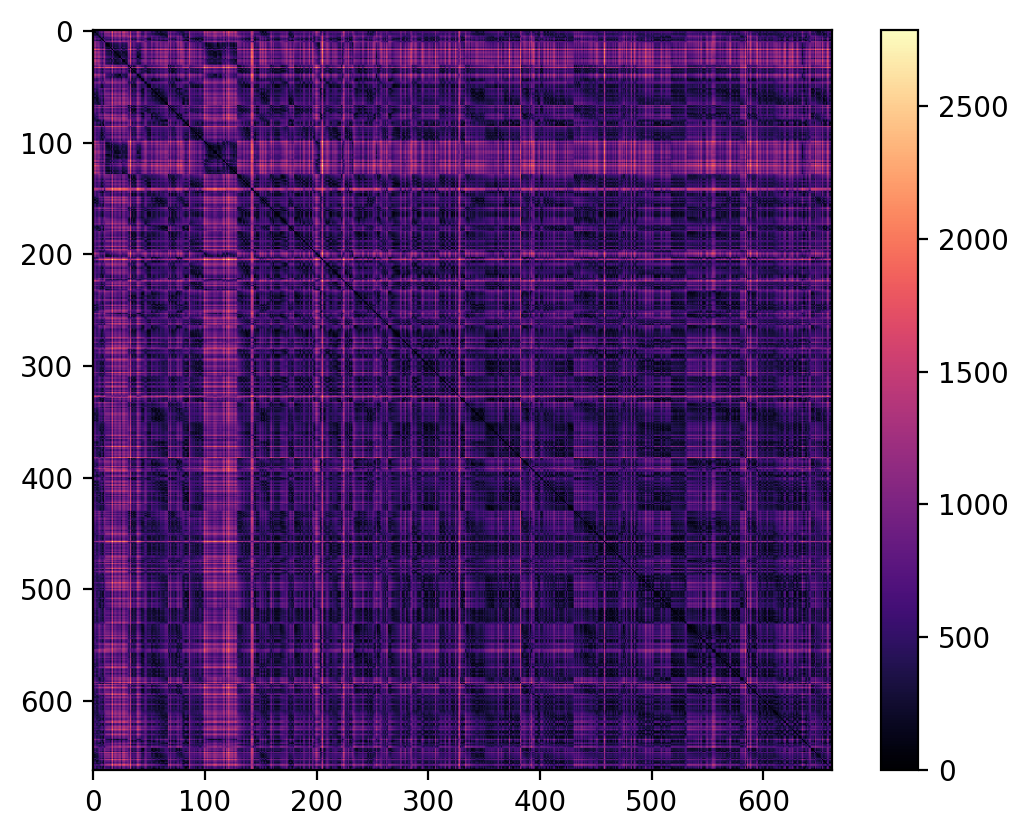

In [14]:
# plot of the distance matrix
plt.imshow(Distance, cmap = "magma")
plt.colorbar()

In [15]:
Distance.shape[0]

662

# Create a Persistence Diagram per batches

batch_1 = all_data[:100, :100]

batch_2 = all_data[100:200, 100:200]...

In [16]:
initial = [0, 100, 200, 300, 400, 500]
final = [100, 200, 300, 400, 500, 600]

## Plot the persistence diagram and the distance matrix

Only keep the lower/upper diagonal of the matrix because it's symetric

usetex mode requires TeX.


Number of simplices=859
Number of simplices=5811
Number of simplices=3757
Number of simplices=6418
Number of simplices=9526
Number of simplices=16159


/tmp/ipykernel_25307/3380879241.py:45: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
/tmp/ipykernel_25307/3380879241.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


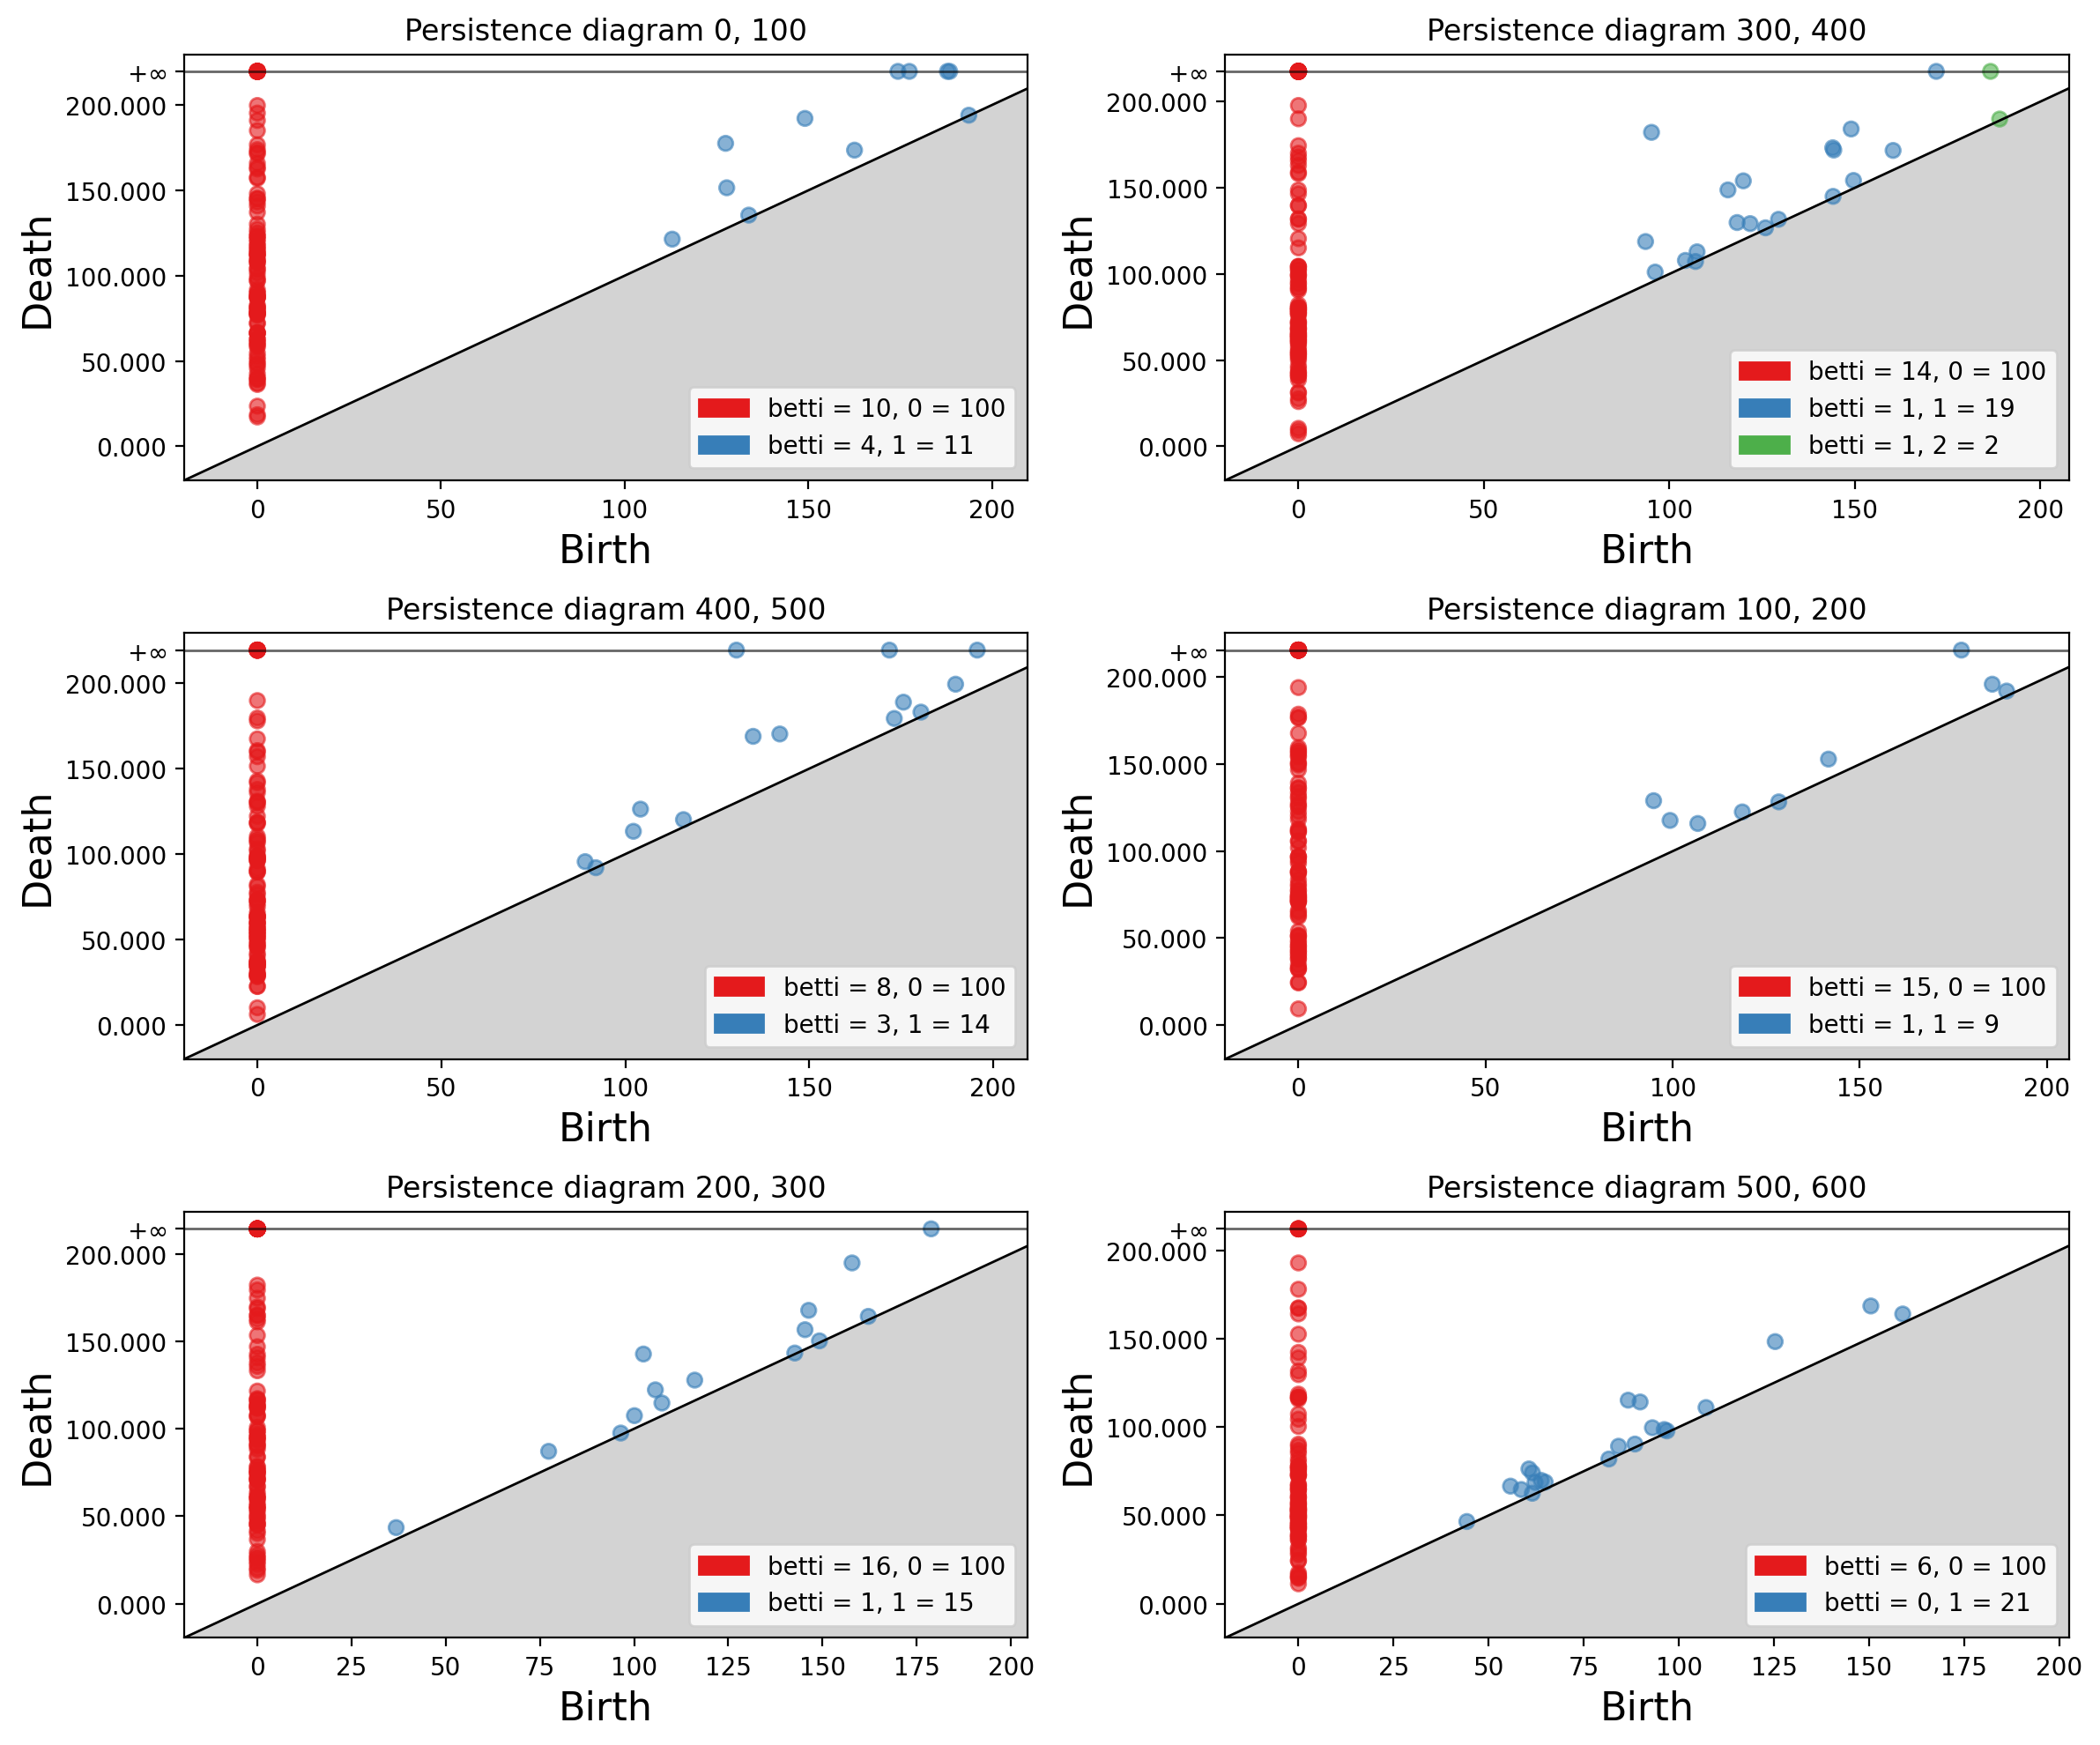

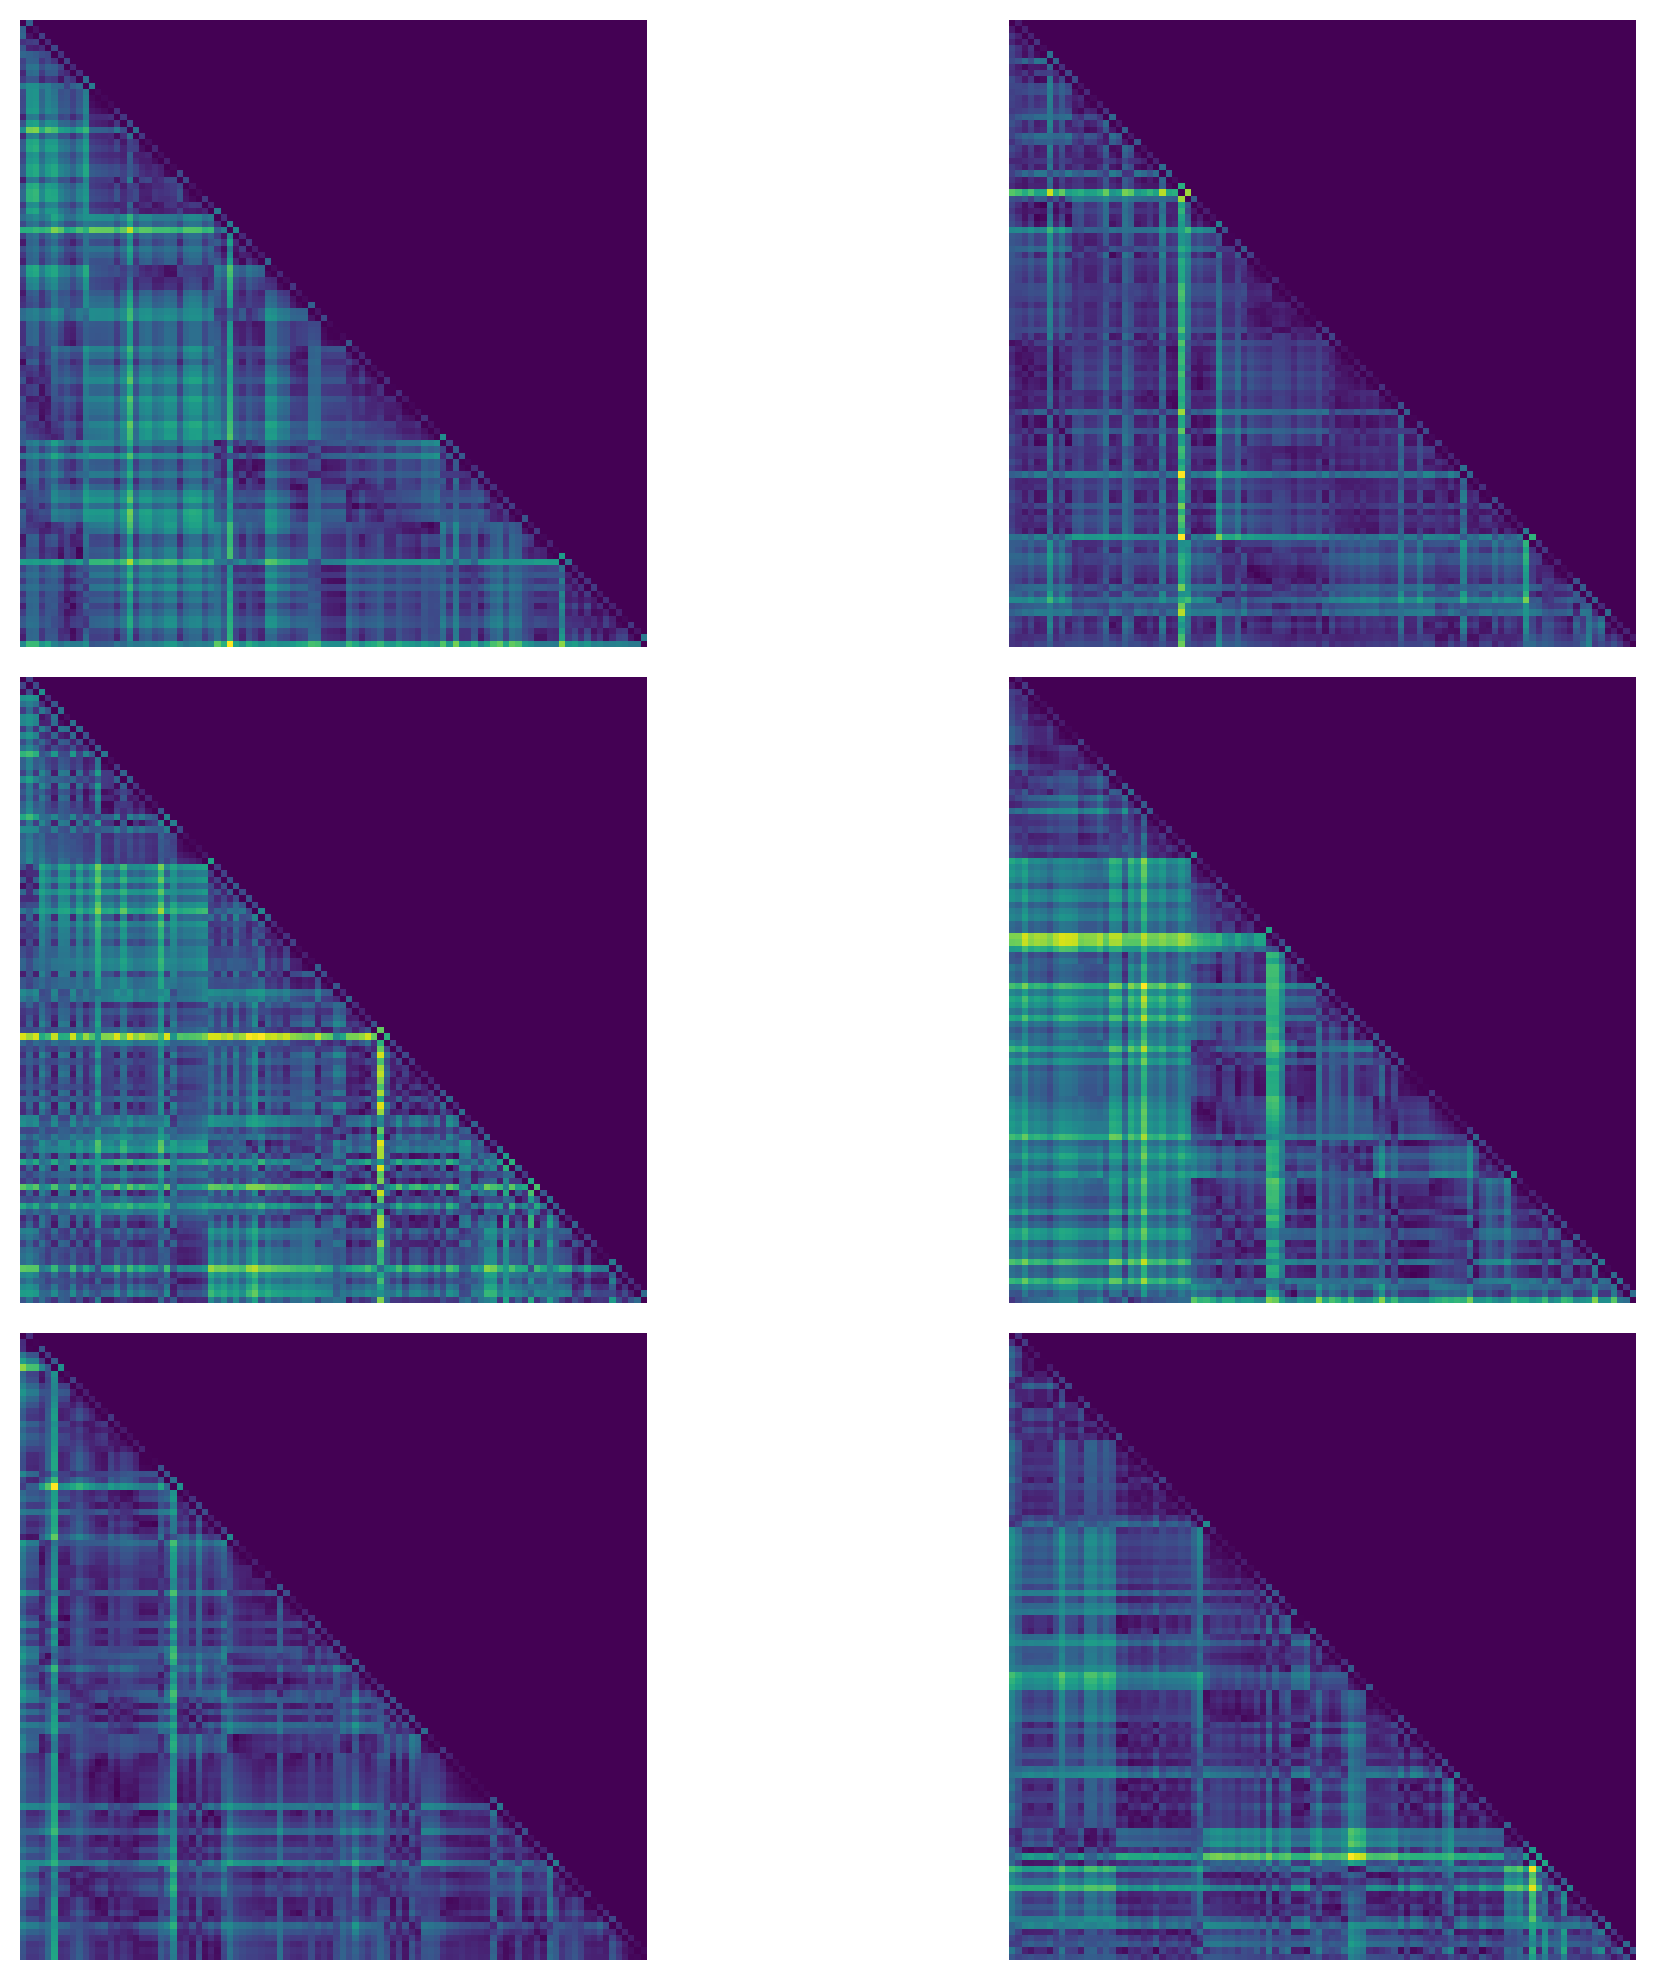

In [17]:
fig, axs = plt.subplots(3, 2, figsize = (12,10))
fig1, axs1 = plt.subplots(3, 2, figsize = (12,10))
colormap = plt.cm.Set1.colors

for ini, f in zip(initial, final):
    # fig, axs = plt.subplots(3, 2)
    batch = Distance[ini:f, ini:f]
    tri_lower_no_diag = np.tril(batch, k=1)
    axs1[(ini//100)%3, (ini//100)%2].imshow(tri_lower_no_diag)
    axs1[(ini//100)%3, (ini//100)%2].axis('off')

    result = []

    for i in range(len(tri_lower_no_diag)):
        row = [tri_lower_no_diag[i][j] for j in range(len(tri_lower_no_diag[i])) if tri_lower_no_diag[i][j] != 0]
        result.append(row)


    distance_matrix = result.copy()
    rips_complex = gudhi.RipsComplex(
        distance_matrix = distance_matrix, max_edge_length = 200)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension = 3)

    message = "Number of simplices=" + repr(simplex_tree.num_simplices())
    print(message)

    diag = simplex_tree.persistence()

    # print("betti_numbers()=")
    # print(simplex_tree.betti_numbers())

    # print(np.unique(np.array([dim for (dim, (birth, death)) in diag]), return_counts=True))
    counts = np.unique(np.array([dim for (dim, (birth, death)) in diag]), return_counts=True)
    # ax1 = plt.subplot(3,2,int(i // 100) + 1)
    gudhi.plot_persistence_diagram(diag, axes = axs[(ini//100)%3, (ini//100)%2])
    axs[(ini//100)%3, (ini//100)%2].set_title("Persistence diagram %s, %s"%((ini,f)))

    dimensions = {item[0] for item in diag}
    axs[(ini//100)%3, (ini//100)%2].legend(
    handles=[mpatches.Patch(color=colormap[dim], 
                            label= "betti = %s, %s = %s"%(simplex_tree.betti_numbers()[dim], dim, counts[1][dim])) for dim in dimensions], 
                            loc="best")

fig1.tight_layout()
fig1.show()
fig.tight_layout()
fig.show()


In [18]:
np.percentile(Distance, 50)

534.5603737669987

# Persisten Diagram but for all the data

The PD is showing structures in 3 dimension of the data. Points far from the diagonal represent features that persist over a range of continum distances (e.g. change the radii around each data point)

* The points in 1st dimension (red) have the same shape as the data = 662. All points have a representation in the 1st dimension.
* There are 259 points in 2nd dimension (blue), only 259 points have a representation in the 2nd dimension (e.g two points connecting/circles overlapping).
* There are 42 points in the 3rd dimension (green), only 42 points have a representation in the 3rd dimension (e.g triangular shape).

Betti Numbers: There is a Betti number for each dimension, so we have 3 Betti numbers. The Betti number represents the number of structures seen in that dimension.

* Betti number for 1st dimension is 22, this dimension measures connectivity. "There are 22 individual clusters in the data".
* Betti number for 2nd dimension is 22, this dimension measures loops, circular structures. "There are 22 loop in the data".
* Betti number for 3rd dimension is 1, this dimension measures voids (e.g. torus hole). "There is 1 void in the data".

2785.752485509838
Number of simplices=4204039
betti_numbers()=
[22, 22, 1]
(array([0, 1, 2]), array([662, 259,  42]))


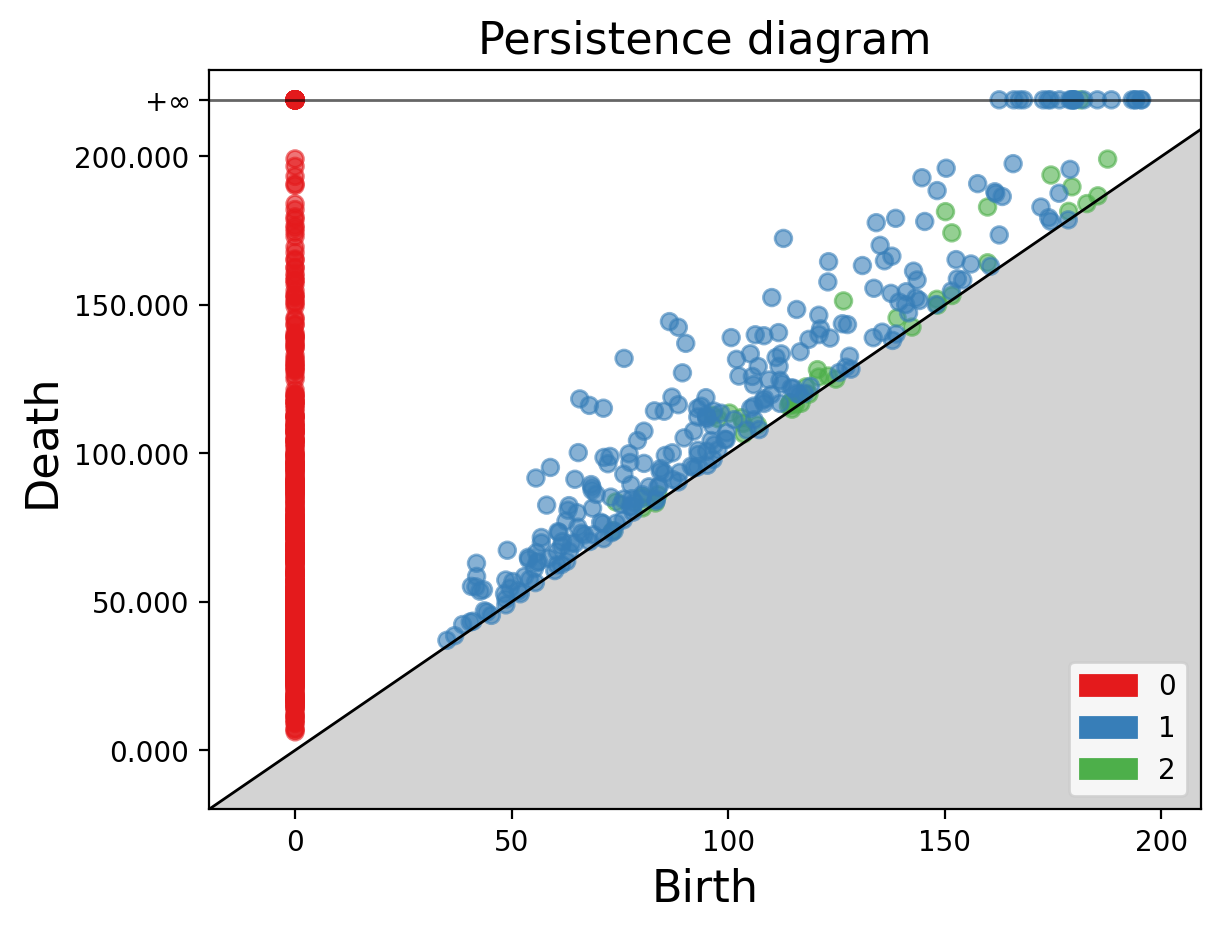

In [53]:
tri_lower_no_diag = np.tril(Distance, k=1)
# plt.imshow(tri_lower_no_diag, origin = "upper")

result = []
print(Distance.max())
for i in range(len(tri_lower_no_diag)):
    row = [tri_lower_no_diag[i][j] for j in range(len(tri_lower_no_diag[i])) if tri_lower_no_diag[i][j] != 0]
    result.append(row)
    

distance_matrix = result.copy()
rips_complex = gudhi.RipsComplex(
    distance_matrix = distance_matrix, max_edge_length = 200)
simplex_tree = rips_complex.create_simplex_tree(max_dimension = 3)

message = "Number of simplices=" + repr(simplex_tree.num_simplices())
print(message)

diag = simplex_tree.persistence()

print("betti_numbers()=")
print(simplex_tree.betti_numbers())
print(np.unique(np.array([dim for (dim, (birth, death)) in diag]), return_counts=True))

gudhi.plot_persistence_diagram(diag, band = 0)
plt.show()

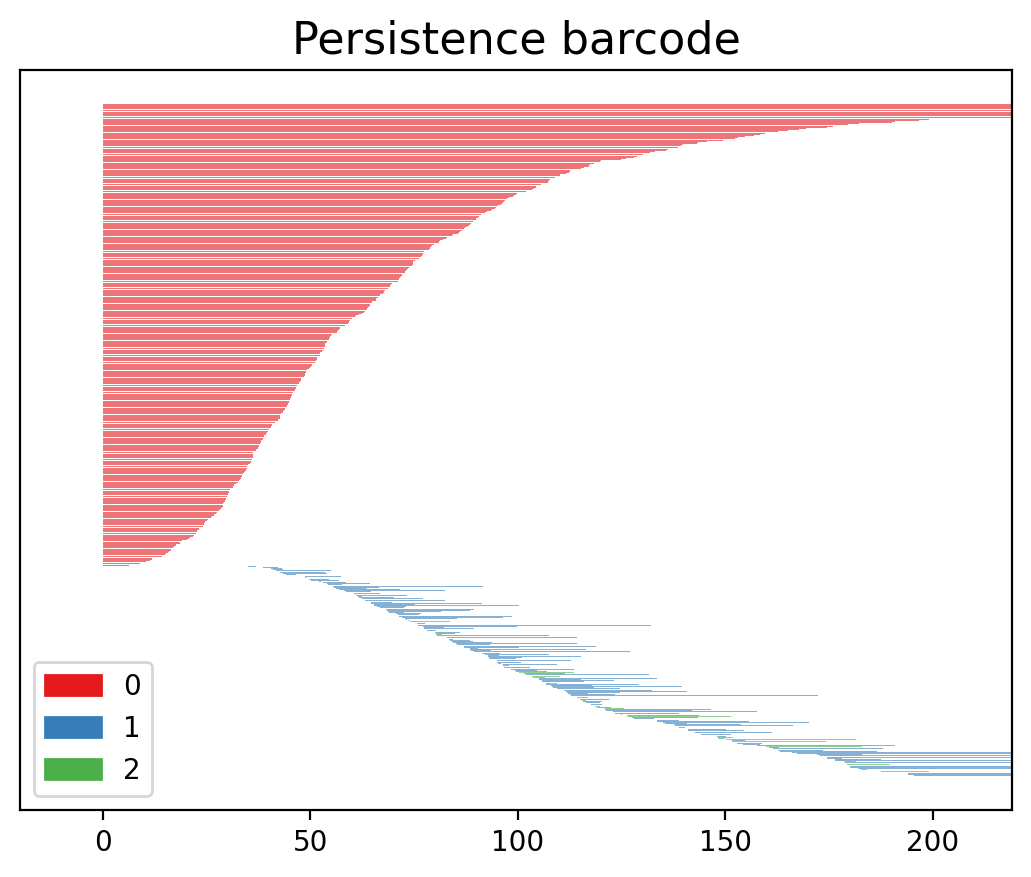

In [20]:
gudhi.plot_persistence_barcode(diag)
plt.show()

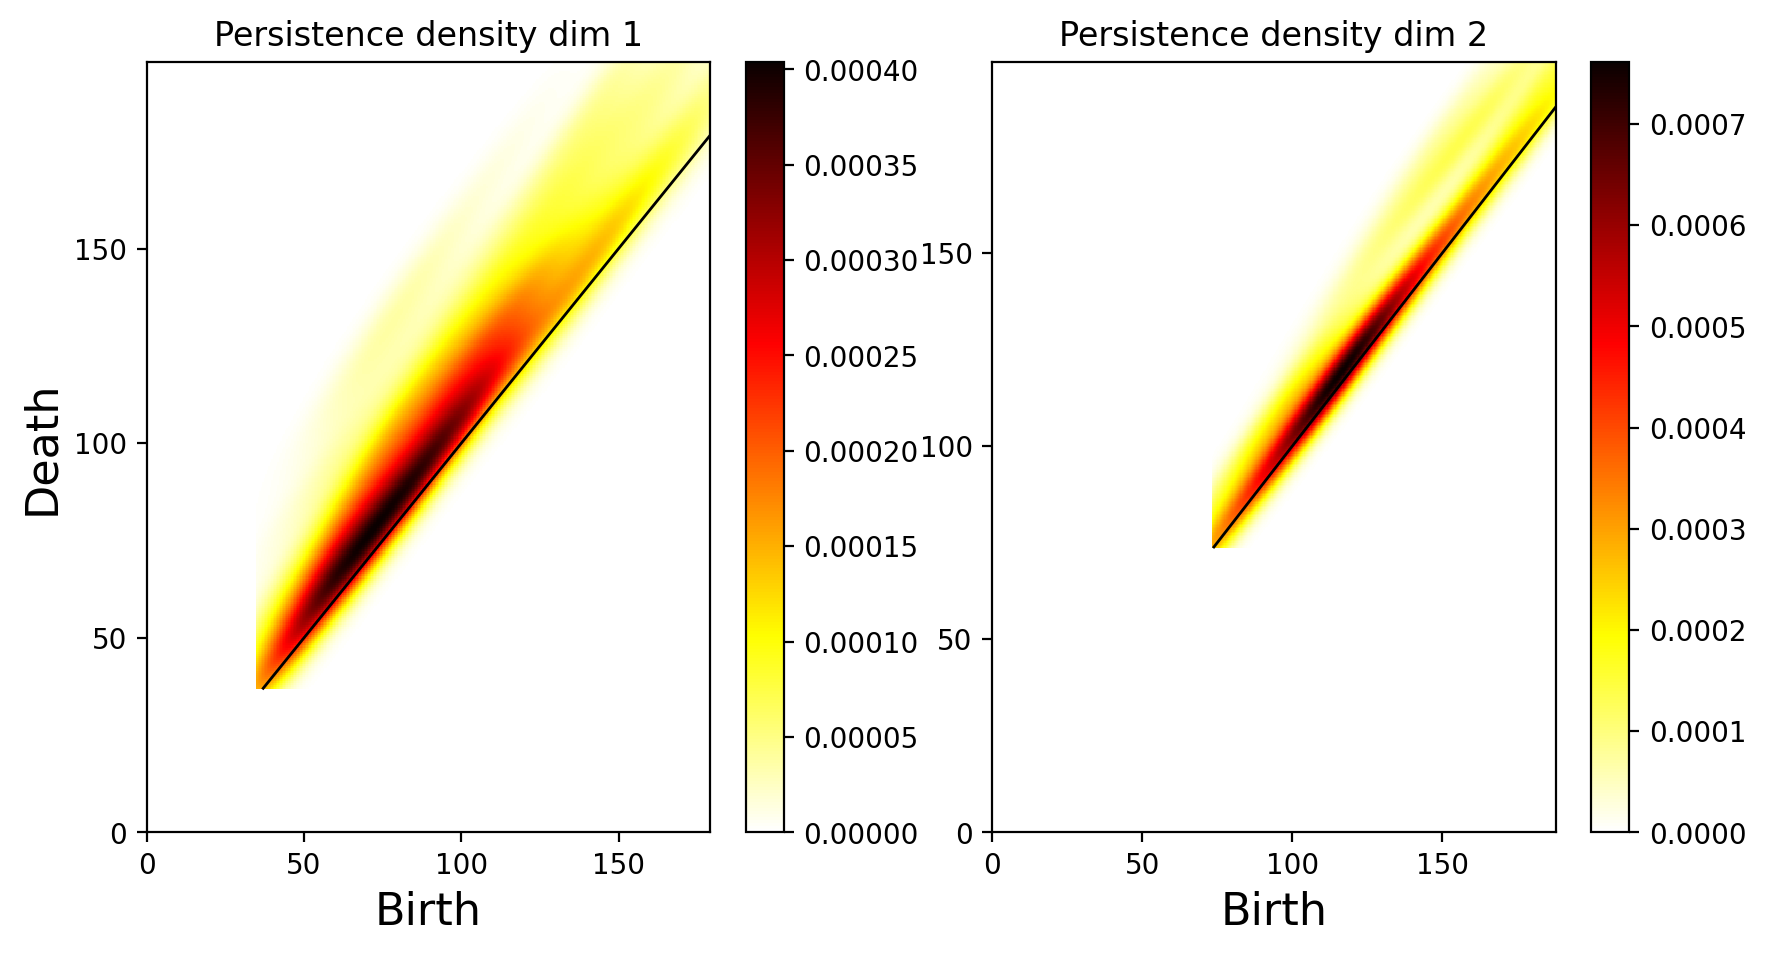

In [45]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
gudhi.plot_persistence_density(diag, dimension = 1, axes = ax[0])
ax[0].set_title("Persistence density dim 1")
ax[0].set_xticks(range(0, 200, 50))
ax[0].set_yticks(range(0, 200, 50))

gudhi.plot_persistence_density(diag, dimension = 2, axes = ax[1])
ax[1].set_title("Persistence density dim 2")
ax[1].set_ylabel(None)
ax[1].set_xticks(range(0, 200, 50))
ax[1].set_yticks(range(0, 200, 50))



plt.show()

In [47]:
import gudhi.representations

In [55]:
L[0]

array([nan, nan, nan, ..., nan, nan, nan])

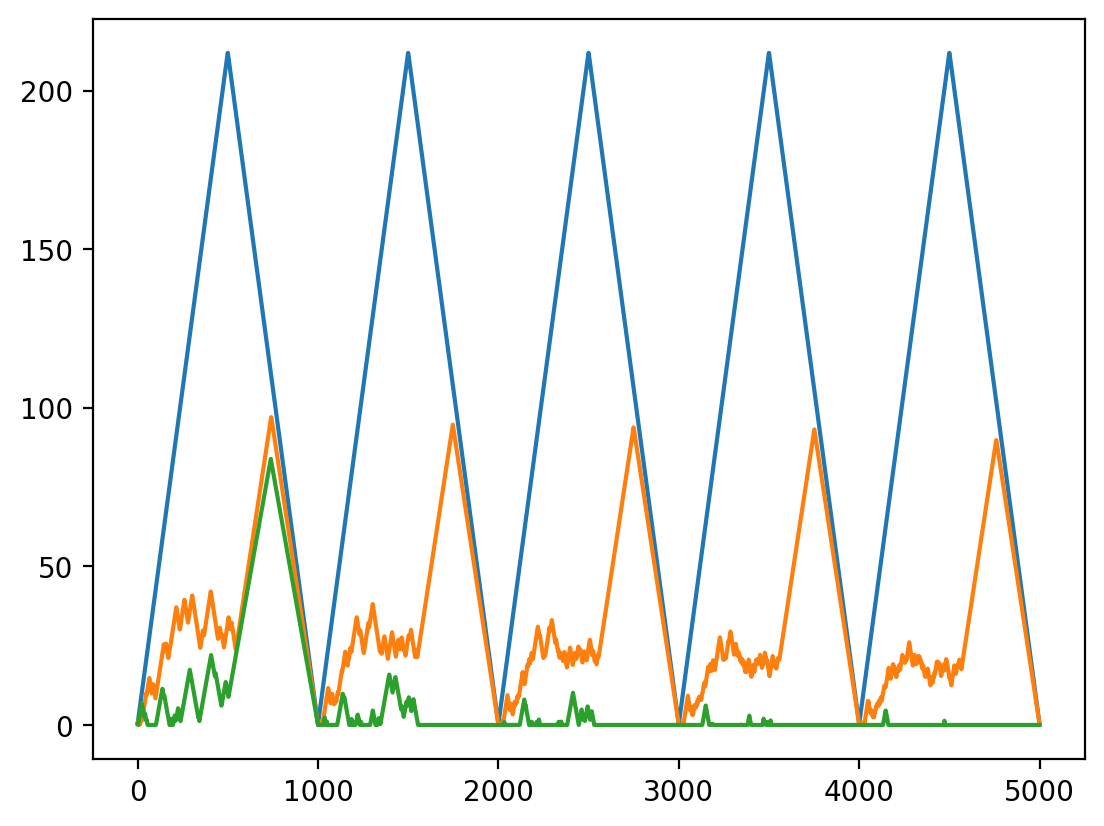

In [104]:
LS = gudhi.representations.Landscape(resolution=1000)
assas = simplex_tree.persistence_intervals_in_dimension(0)
assas[~np.isfinite(assas)] = 300
L = LS.fit_transform([assas])
plt.plot(L[0])

LS = gudhi.representations.Landscape(resolution=1000)
assas = simplex_tree.persistence_intervals_in_dimension(1)
assas[~np.isfinite(assas)] = 300
L = LS.fit_transform([assas])
plt.plot(L[0])

LS = gudhi.representations.Landscape(resolution=1000)
assas = simplex_tree.persistence_intervals_in_dimension(2)
assas[~np.isfinite(assas)] = 300
L = LS.fit_transform([assas])
plt.plot(L[0])

# plt.show()

Text(0.5, 1.0, 'dim 3')

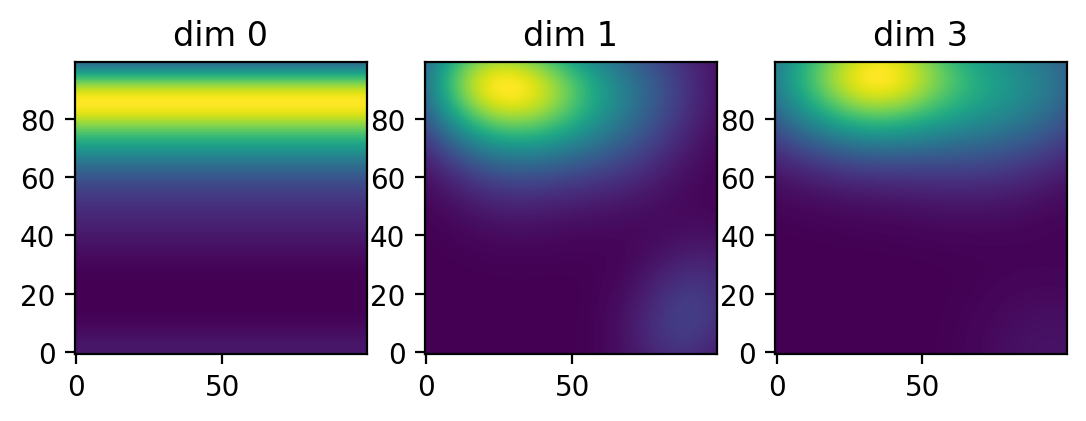

In [157]:
PI = gudhi.representations.PersistenceImage(bandwidth = 20, resolution = [100, 100])
assas = simplex_tree.persistence_intervals_in_dimension(0)
assas[~np.isfinite(assas)] = 300
pi = PI.fit_transform([assas])
plt.subplot(131)
plt.imshow(np.flip(np.reshape(pi[0], [100,100]), 0), origin="lower")
plt.title("dim 0")

PI = gudhi.representations.PersistenceImage(bandwidth = 20, resolution = [100, 100])
assas = simplex_tree.persistence_intervals_in_dimension(1)
assas[~np.isfinite(assas)] = 300
pi = PI.fit_transform([assas])
plt.subplot(132)
plt.imshow(np.flip(np.reshape(pi[0], [100,100]), 0), origin="lower")
plt.title("dim 1")

PI = gudhi.representations.PersistenceImage(bandwidth = 20, resolution = [100, 100])
assas = simplex_tree.persistence_intervals_in_dimension(2)
assas[~np.isfinite(assas)] = 300
pi = PI.fit_transform([assas])
plt.subplot(133)
plt.imshow(np.flip(np.reshape(pi[0], [100,100]), 0), origin="lower")
plt.title("dim 3")

# Persistence Diagram all data but using another package Alpha Complex

Here you don't need to create the distance matrix, the input is the x, y and z coordinates.

In [21]:
points_d = np.vstack([x_redu, y_redu, z_redu]).reshape(662, 3)
points_d.shape

(662, 3)

Alpha complex is of dimension  3  -  1036  simplices -  662  vertices.
betti_numbers()=
[545, 3, 0]
(array([0, 1, 2]), array([662,  53,  11]))


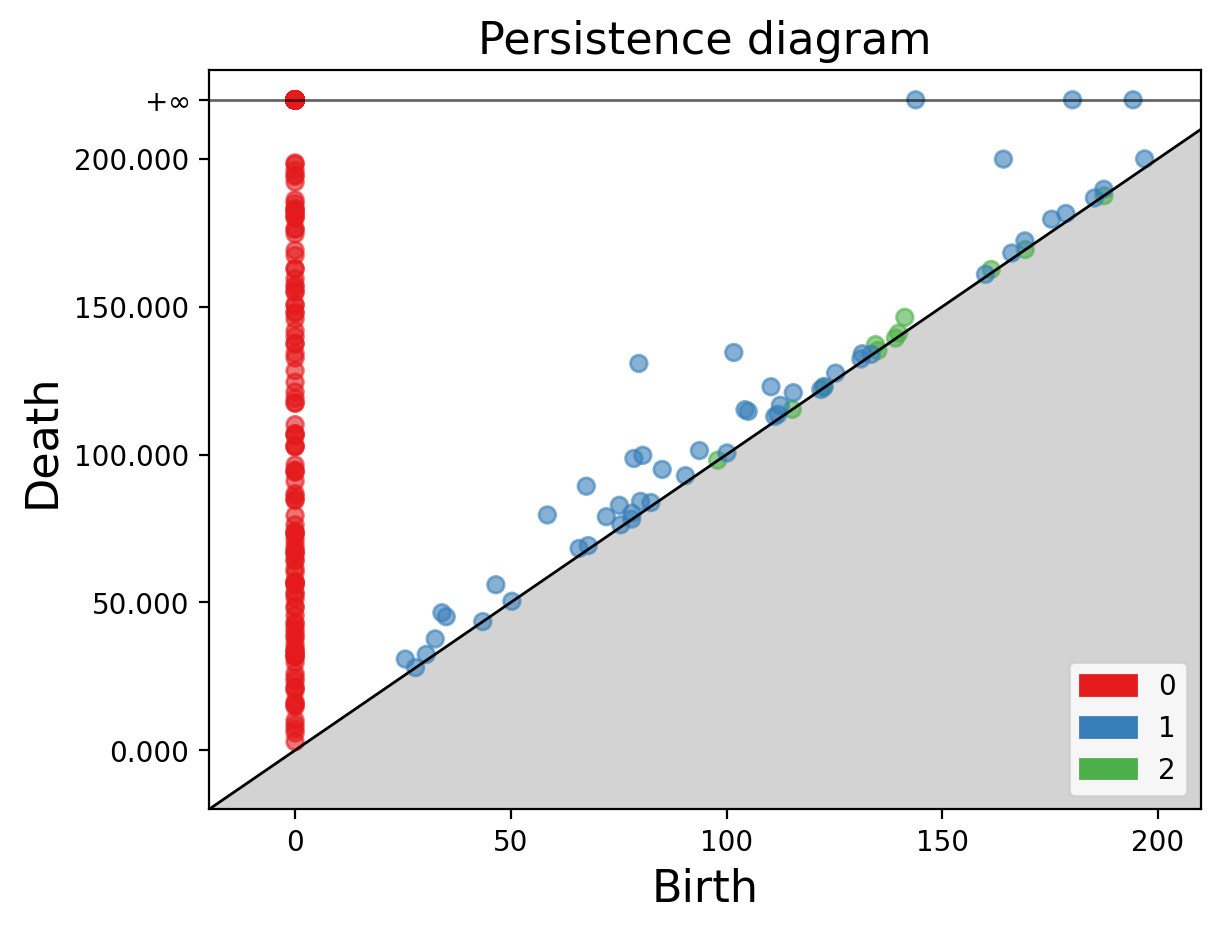

In [22]:
ac = gudhi.AlphaComplex(points = points_d)

stree = ac.create_simplex_tree(max_alpha_square = 200)
print('Alpha complex is of dimension ', stree.dimension(), ' - ',
  stree.num_simplices(), ' simplices - ', stree.num_vertices(), ' vertices.')

diag = stree.persistence()

print("betti_numbers()=")
print(stree.betti_numbers())
print(np.unique(np.array([dim for (dim, (birth, death)) in diag]), return_counts=True))

gudhi.plot_persistence_diagram(diag, band = 0)
plt.show()